In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")

In [6]:
csrTF = True


bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_12101174345495013796.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77872199 13.3970811  23.51278494 16.8307956 ]
Objective Function Value at Optimal Parameters: 9.505958617749993e-12
Number of Iterations: 260
Converged: True


In [7]:
#trackStart = "ENDBC14E"
#trackEnd = "PR15944"
trackEnd = "ENDBC14E"

for L2PhaseSet in np.arange(-40, -30, 0.5):
    setLattice(tao, **( importedDefaultSettings | {"L2PhaseSet" : L2PhaseSet} ) )
    
    trackBeam(tao, 
          trackEnd = trackEnd, 
          **importedDefaultSettings
         )
    
    P = getBeamAtElement(tao, trackEnd)

   
    sigmaZ = smallestIntervalImpliedSigma(P.z)
    peakCurrent = max(P.slice_statistics(slice_key = "delta_t", n_slice = 100)["current"])
    
    SI90Emit = smallestIntervalImpliedEmittance(P)
    rms100Emit = P.twiss(fraction = 1.0)["norm_emit_x"]
    rms95Emit = P.twiss(fraction = 0.95)["norm_emit_x"]
    rms90Emit = P.twiss(fraction = 0.9)["norm_emit_x"]

    

    
    print(f"""{L2PhaseSet}, {peakCurrent}, {sigmaZ}, {SI90Emit}, {rms100Emit}, {rms95Emit}, {rms90Emit}""")

-40.0, 1839.832001882797, 9.341394304555081e-05, 1.0249687814667741e-05, 1.5300749689801167e-05, 5.483148357706039e-06, 3.87257604530159e-06
-39.5, 2125.2362578232646, 8.329056188280936e-05, 1.0152004550526597e-05, 1.512395817663971e-05, 5.486403283048751e-06, 3.871776813944137e-06
-39.0, 2468.7611276987877, 7.335722532757104e-05, 1.0045946266274806e-05, 1.4965058027026411e-05, 5.504766152150957e-06, 3.879698685563202e-06
-38.5, 2891.163287077533, 6.352811771033222e-05, 9.904427503105043e-06, 1.4868729658757796e-05, 5.540557624061913e-06, 3.917490512860975e-06
-38.0, 3703.411289465376, 5.387996445994699e-05, 9.884702023486786e-06, 1.4840537713083507e-05, 5.625986585985892e-06, 4.017453199536896e-06
-37.5, 4755.8784833602385, 4.436455490991653e-05, 9.985487316694427e-06, 1.4907949457832468e-05, 5.793182057536245e-06, 4.207844629972622e-06
-37.0, 6741.873673373427, 3.4986587548404976e-05, 1.0250176329773543e-05, 1.512488909569923e-05, 6.136369767375499e-06, 4.5764761912326984e-06
-36.5, 

In [ ]:
trackStart = "ENDBC14E"
trackEnd = "PR15944"

trackBeam(tao, trackEnd = trackStart, **importedDefaultSettings)

PStart = getBeamAtElement(tao, trackStart)

makeBeamActiveBeamFile( PStart, tao = tao )

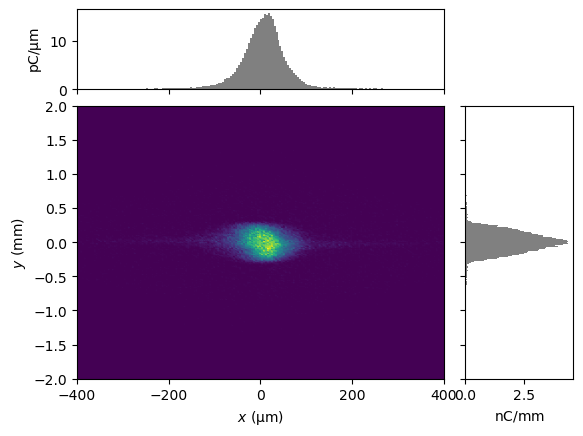

{'PDrive_median_x': 8.428572075655014e-06,
 'PDrive_median_y': 3.7438949164066275e-07,
 'PDrive_median_xp': 7.345893955728737e-07,
 'PDrive_median_yp': -1.81716890991893e-08,
 'PDrive_sigmaSI90_x': 6.669769518850885e-05,
 'PDrive_sigmaSI90_y': 0.0001456769905960905,
 'PDrive_sigmaSI90_z': 3.840356472048036e-05,
 'PDrive_sigmaSI90_xp': 1.2468066157949566e-05,
 'PDrive_sigmaSI90_yp': 5.631181271457153e-06,
 'PDrive_emitSI90_x': 6.026602434504503e-06,
 'PDrive_emitSI90_y': 3.3244097950095536e-06,
 'PDrive_norm_emit_x': 3.247605804130828e-06,
 'PDrive_norm_emit_y': 1.7915853172084757e-06,
 'PDrive_charge_nC': 1.5996480000000006}

<Figure size 640x480 with 0 Axes>

In [4]:
trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)

P = getBeamAtElement(tao, trackEnd)
display(plotMod(P, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

getBeamSpecs(P)

In [5]:
#Get peak current
max(P.slice_statistics(slice_key = "delta_t", n_slice = 100)["current"])

10069.148557978046

## L2 phase scan

In [6]:
def spotFromTwiss(P, fraction = 1):
    twiss = P.twiss(fraction = fraction)
    return np.sqrt(  twiss['beta_x'] * twiss['emit_x'] )

In [7]:
tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

trackStart = "ENDBC14E"
trackEnd = "PR15944"
trackBeam(tao, trackEnd = trackStart, **importedDefaultSettings)
PStart = getBeamAtElement(tao, trackStart)
makeBeamActiveBeamFile( PStart, tao = tao )




data = []
quadStep = 5
allQuadSettings = np.arange(-60, 0 + quadStep, quadStep)

for quadSetting in allQuadSettings:
    setQuadkG(tao, "Q14901", quadSetting)


    transferMatrix = getMatrix(tao, trackStart, trackEnd)

    trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)

    P = getBeamAtElement(tao, trackEnd)
    
    spotSize = smallestIntervalImpliedSigma(P.x)
    #spotSize = P["sigma_x"]

    data.append(
        {
            "quadSetting" : quadSetting,
            "R11" : transferMatrix[0][0],
            "R12" : transferMatrix[0][1],
            "sigma" : spotSize,
            "beam" : P
        }
    )

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_6679942956867205398.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77872199 13.3970811  23.51278494 16.8307956 ]
Objective Function Value at Optimal Parameters: 9.505958617749993e-12
Number of Iterations: 260
Converged: True


In [8]:
#Emittance measurements

dataTmp = data.copy()
for row in dataTmp:
    row["sigma"] = smallestIntervalImpliedSigma(row["beam"]["x"])
results = generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

print(f"""Scan SI90: {1e6 * results["emit"]}""")
print(f"""PStart SI90: {1e6 * smallestIntervalImpliedEmittance( PStart )}""")
print()


dataTmp = data.copy()
for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 1.0)
results = generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

print(f"""Scan 100% RMS: {1e6 * results["emit"]}""")
print(f"""PStart 100% RMS: {1e6 * PStart.twiss(fraction = 1.0)["norm_emit_x"]}""")
print()

dataTmp = data.copy()
for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 0.95)
results = generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

print(f"""Scan 95% RMS: {1e6 * results["emit"]}""")
print(f"""PStart 95% RMS: {1e6 * PStart.twiss(fraction = 0.95 )["norm_emit_x"]}""")
print()

dataTmp = data.copy()
for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 0.9)
results = generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

print(f"""Scan 90% RMS: {1e6 * results["emit"]}""")
print(f"""PStart 90% RMS: {1e6 * PStart.twiss(fraction = 0.9 )["norm_emit_x"]}""")
print()

Scan SI90: 1.1338679001312197
PStart SI90: 6.75772120683188

Scan 100% RMS: 1.7511741103440328
PStart 100% RMS: 13.266792587655187

Scan 95% RMS: 0.6657547493705326
PStart 95% RMS: 4.7409901240575705

Scan 90% RMS: 0.43509996296283693
PStart 90% RMS: 3.1447796624419544



In [16]:
dataTmp = data.copy()
for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 1.0)
results = generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

# print(f"""Scan 100% RMS: {1e6 * results["emit"]}""")
# print(f"""PStart 100% RMS: {1e6 * PStart.twiss(fraction = 1.0)["norm_emit_x"]}""")
# print()

results

{'beta': 0.804318771023081,
 'alpha': 0.4585624914822845,
 'emitGeo': 1.9885554897462237e-10,
 'emit': 1.7511741103440328e-06}

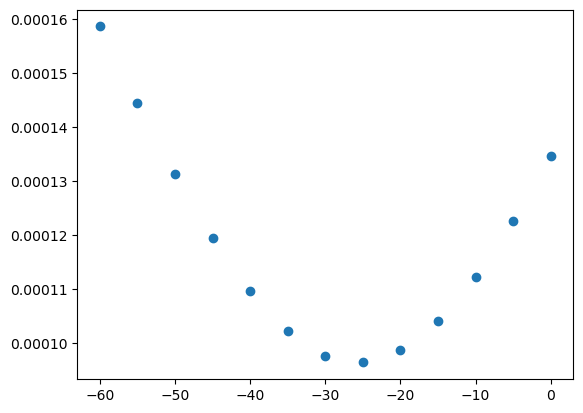

In [10]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [spotFromTwiss(i["beam"]) for i in data]
)
plt.show()

In [17]:
generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

{'beta': 0.804318771023081,
 'alpha': 0.4585624914822845,
 'emitGeo': 1.9885554897462237e-10,
 'emit': 1.7511741103440328e-06}

In [18]:
generalizedEmittanceSolver( data, energyGeV = 4.5 )

{'beta': 0.804318771023081,
 'alpha': 0.4585624914822845,
 'emitGeo': 1.9885554897462237e-10,
 'emit': 1.7511741103440328e-06}